**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "List_combine_Log2FC.RDS"
fpath = file.path(fdiry, fname)
lst = readRDS(fpath)

lst_peak_Log2FC = lst
cat(names(lst), "\n\n")
cat(colnames(lst[[1]]), "\n\n")
for(dat in lst){
    print(dim(dat))
    print(head(dat, 3))
    cat("\n")
}

KS91_K562_ASTARRseq A001_K562_WSTARRseq Tewhey_K562_TileMPRA 

Chrom Start End Peak Region baseMean log2FoldChange lfcSE stat pvalue padj Assay 

[1] 417  12
# A tibble: 3 × 12
  Chrom     Start       End Peak    Region baseM…¹ log2F…²  lfcSE  stat   pvalue
  <chr>     <dbl>     <dbl> <chr>   <chr>    <dbl>   <dbl>  <dbl> <dbl>    <dbl>
1 chr8  126778902 126779728 chr8_1… MYC      426.    0.425 0.0658  6.45 1.10e-10
2 chr8  126782925 126783318 chr8_1… MYC       56.4   0.561 0.165   3.39 6.96e- 4
3 chr8  126804776 126805825 chr8_1… MYC      647.    0.548 0.0531 10.3  5.65e-25
# … with 2 more variables: padj <dbl>, Assay <fct>, and abbreviated variable
#   names ¹​baseMean, ²​log2FoldChange

[1] 417  12
# A tibble: 3 × 12
  Chrom    Start    End Peak  Region baseM…¹ log2F…² lfcSE   stat  pvalue   padj
  <chr>    <dbl>  <dbl> <chr> <chr>    <dbl>   <dbl> <dbl>  <dbl>   <dbl>  <dbl>
1 chr8    1.27e8 1.27e8 chr8… MYC       39.7 -0.0741 0.226 -0.327 0.743   0.891 
2 chr8    1.27e8 1.27e8 chr

In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [4]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::select(Peak, Region, Assay, log2FoldChange) %>% 
    tidyr::spread(Assay, log2FoldChange)
head(dat)

Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456


## Calculate rank differences

In [6]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::select(Peak, Region, Assay, log2FoldChange) %>% 
    tidyr::spread(Assay, log2FoldChange)

###
lst = split(dat, dat$Region)
lst = lapply(lst, function(dat){
    dat = dat %>% 
        mutate(
            rank_ASTARR = rank(KS91_K562_ASTARRseq),
            rank_WSTARR = rank(A001_K562_WSTARRseq),
            rank_TMPRA  = rank(Tewhey_K562_TileMPRA),
            
            ranknorm_ASTARR = rank(KS91_K562_ASTARRseq)  / length(KS91_K562_ASTARRseq),
            ranknorm_WSTARR = rank(A001_K562_WSTARRseq)  / length(A001_K562_WSTARRseq),
            ranknorm_TMPRA  = rank(Tewhey_K562_TileMPRA) / length(Tewhey_K562_TileMPRA)
        ) %>% 
        mutate(
            rank_diff_ASTARR_WSTARR = rank_ASTARR - rank_WSTARR,
            rank_diff_ASTARR_TMPRA  = rank_ASTARR - rank_TMPRA,
            rank_diff_WSTARR_TMPRA  = rank_WSTARR - rank_TMPRA,
            
            ranknorm_diff_ASTARR_WSTARR = ranknorm_ASTARR - ranknorm_WSTARR,
            ranknorm_diff_ASTARR_TMPRA  = ranknorm_ASTARR - ranknorm_TMPRA,
            ranknorm_diff_WSTARR_TMPRA  = ranknorm_WSTARR - ranknorm_TMPRA
        )
    return(dat)
})

### standardize differences
dat = bind_rows(lst)
dat = dat %>% 
    mutate(
        z_rank_diff_ASTARR_WSTARR = as.double(scale(rank_diff_ASTARR_WSTARR)),
        z_rank_diff_ASTARR_TMPRA  = as.double(scale(rank_diff_ASTARR_TMPRA)),
        z_rank_diff_WSTARR_TMPRA  = as.double(scale(rank_diff_WSTARR_TMPRA)),

        z_ranknorm_diff_ASTARR_WSTARR = as.double(scale(ranknorm_diff_ASTARR_WSTARR)),
        z_ranknorm_diff_ASTARR_TMPRA  = as.double(scale(ranknorm_diff_ASTARR_TMPRA)),
        z_ranknorm_diff_WSTARR_TMPRA  = as.double(scale(ranknorm_diff_WSTARR_TMPRA))
    )
    
###
dat_rank_diff = dat
print(dim(dat))
head(dat)

[1] 417  23


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,ranknorm_ASTARR,ranknorm_WSTARR,⋯,rank_diff_WSTARR_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_rank_diff_ASTARR_WSTARR,z_rank_diff_ASTARR_TMPRA,z_rank_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0.1739130,0.1739130,⋯,-4,0.0000000,-0.1739130,-0.1739130,0.00000000,-0.06980891,-0.07729038,-3.446856e-19,-5.728829e-01,-0.6185830
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,0.4347826,0.5652174,⋯,9,-0.1304348,0.2608696,0.3913043,-0.05181686,0.10471337,0.17390337,-4.322971e-01,8.593243e-01,1.3918116
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,0.6521739,0.3043478,⋯,-8,0.3478261,0.0000000,-0.3478261,0.13817830,0.00000000,-0.15458077,1.152792e+00,-4.933219e-19,-1.2371659
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,0.3478261,0.5217391,⋯,-8,-0.1739130,-0.5217391,-0.3478261,-0.06908915,-0.20942674,-0.15458077,-5.763961e-01,-1.718649e+00,-1.2371659
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,0.1304348,0.8260870,⋯,5,-0.6956522,-0.4782609,0.2173913,-0.27635660,-0.19197451,0.09661298,-2.305584e+00,-1.575428e+00,0.7732287
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,0.6086957,0.7391304,⋯,-5,-0.1304348,-0.3478261,-0.2173913,-0.05181686,-0.13961783,-0.09661298,-4.322971e-01,-1.145766e+00,-0.7732287


In [8]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::select(Peak, Region, Assay, log2FoldChange) %>% 
    tidyr::spread(Assay, log2FoldChange)

dat = dat %>%
    mutate(
        ranknorm_ASTARR = rank(KS91_K562_ASTARRseq)  / length(KS91_K562_ASTARRseq),
        ranknorm_WSTARR = rank(A001_K562_WSTARRseq)  / length(A001_K562_WSTARRseq),
        ranknorm_TMPRA  = rank(Tewhey_K562_TileMPRA) / length(Tewhey_K562_TileMPRA)
    ) %>%
    mutate(
        ranknorm_diff_ASTARR_WSTARR = ranknorm_ASTARR - ranknorm_WSTARR,
        ranknorm_diff_ASTARR_TMPRA  = ranknorm_ASTARR - ranknorm_TMPRA,
        ranknorm_diff_WSTARR_TMPRA  = ranknorm_WSTARR - ranknorm_TMPRA
    ) %>%
    mutate(
        z_ranknorm_diff_ASTARR_WSTARR = as.double(scale(ranknorm_diff_ASTARR_WSTARR)),
        z_ranknorm_diff_ASTARR_TMPRA  = as.double(scale(ranknorm_diff_ASTARR_TMPRA)),
        z_ranknorm_diff_WSTARR_TMPRA  = as.double(scale(ranknorm_diff_WSTARR_TMPRA))
    )

dat_rank_diff_tot = dat
head(dat)

Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,ranknorm_ASTARR,ranknorm_WSTARR,ranknorm_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,0.05995204,0.2829736,0.4436451,-0.2230216,-0.38369305,-0.1606715,-0.7261479,-1.2366712,-0.5649234
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,0.25899281,0.5179856,0.3285372,-0.2589928,-0.06954436,0.1894484,-0.8432685,-0.2241466,0.6661037
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,0.52997602,0.3573141,0.5755396,0.1726619,-0.04556355,-0.2182254,0.5621790,-0.1468547,-0.7672840
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,0.13189448,0.4700240,0.8729017,-0.3381295,-0.74100719,-0.4028777,-1.1009339,-2.3883212,-1.4165244
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,0.04796163,0.7314149,0.5299760,-0.6834532,-0.48201439,0.2014388,-2.2252918,-1.5535681,0.7082622
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,0.52038369,0.6690647,0.9088729,-0.1486811,-0.38848921,-0.2398082,-0.4840986,-1.2521295,-0.8431693


## Store results

In [23]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_rank_diff, fpath)
cat(fpath, "\n")

/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/comparison/comparison_global/result.rank_diff.tsv 


In [11]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff_tot.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_rank_diff_tot, fpath)
cat(fpath, "\n")

/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/comparison/comparison_global/result.rank_diff_tot.tsv 


## Rank visualization

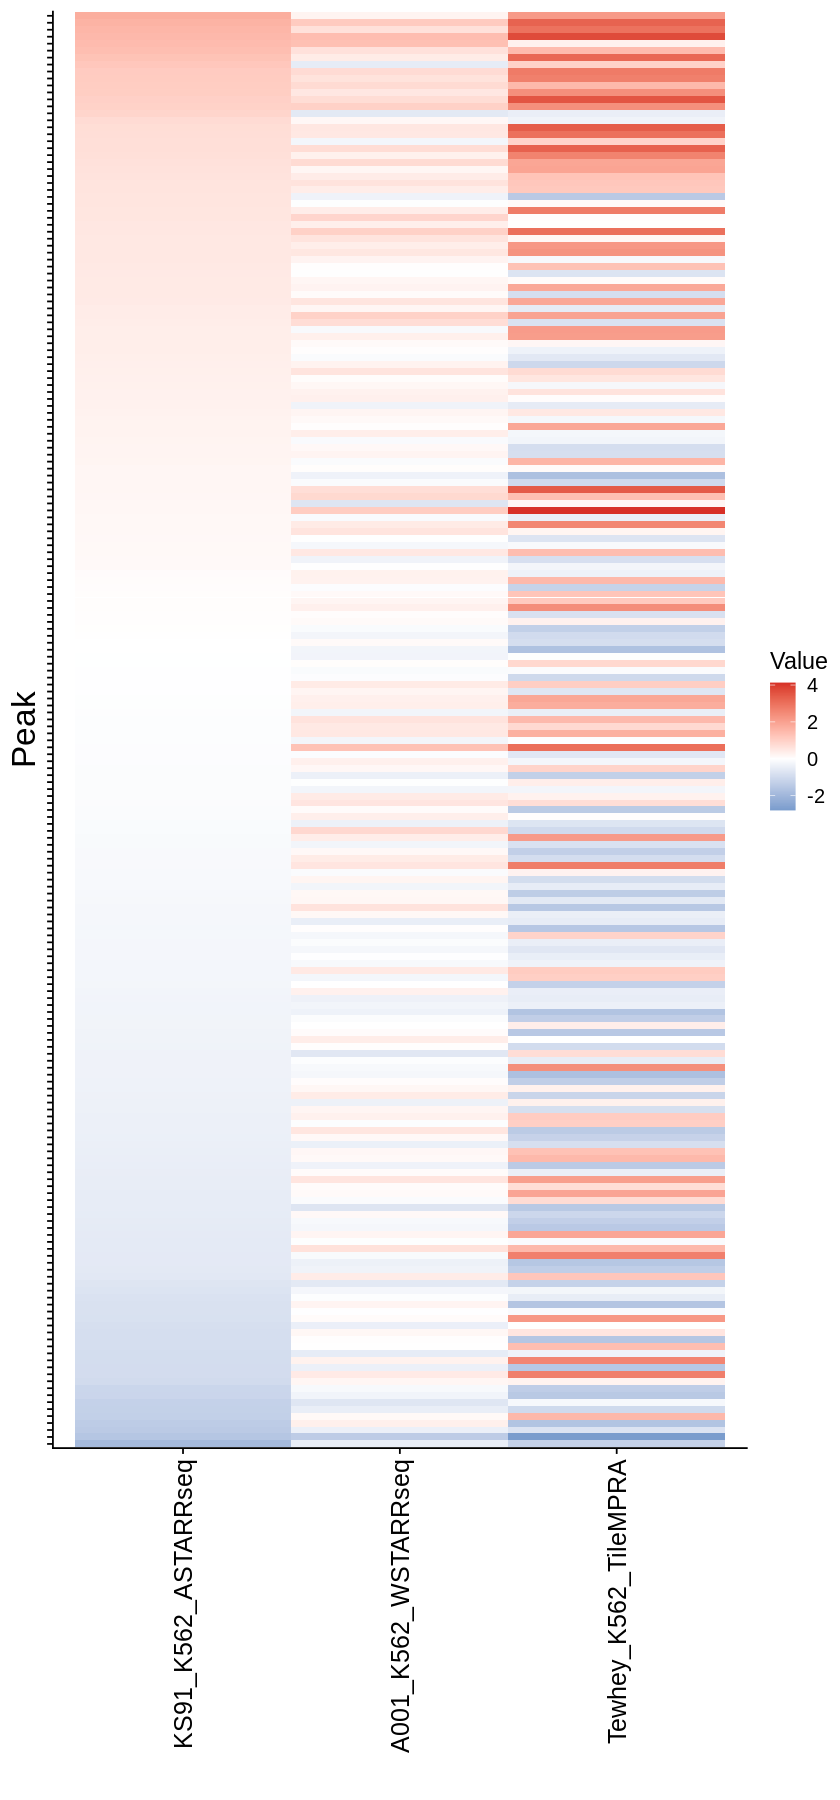

In [14]:
dat = lst[[2]] 
dat = dat %>% arrange(KS91_K562_ASTARRseq)
peaks = dat$Peak
assays = c("KS91_K562_ASTARRseq", "A001_K562_WSTARRseq", "Tewhey_K562_TileMPRA")

dat = dat %>% 
    dplyr::select(Peak, KS91_K562_ASTARRseq, A001_K562_WSTARRseq, Tewhey_K562_TileMPRA) %>% 
    tidyr::gather(Sample, Value, -Peak)

dat$Sample = factor(dat$Sample, levels=assays)
dat$Peak = factor(dat$Peak, levels = peaks)
gpt = ggplot(dat, aes(x=Sample, y=Peak, fill=Value)) + 
    geom_tile() + 
    labs(x="") +
    scale_fill_gradient2(
      low  = "#2171b5",
      mid  = "white",
      high = "#d73027") +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size = 20),
        axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_blank())

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)

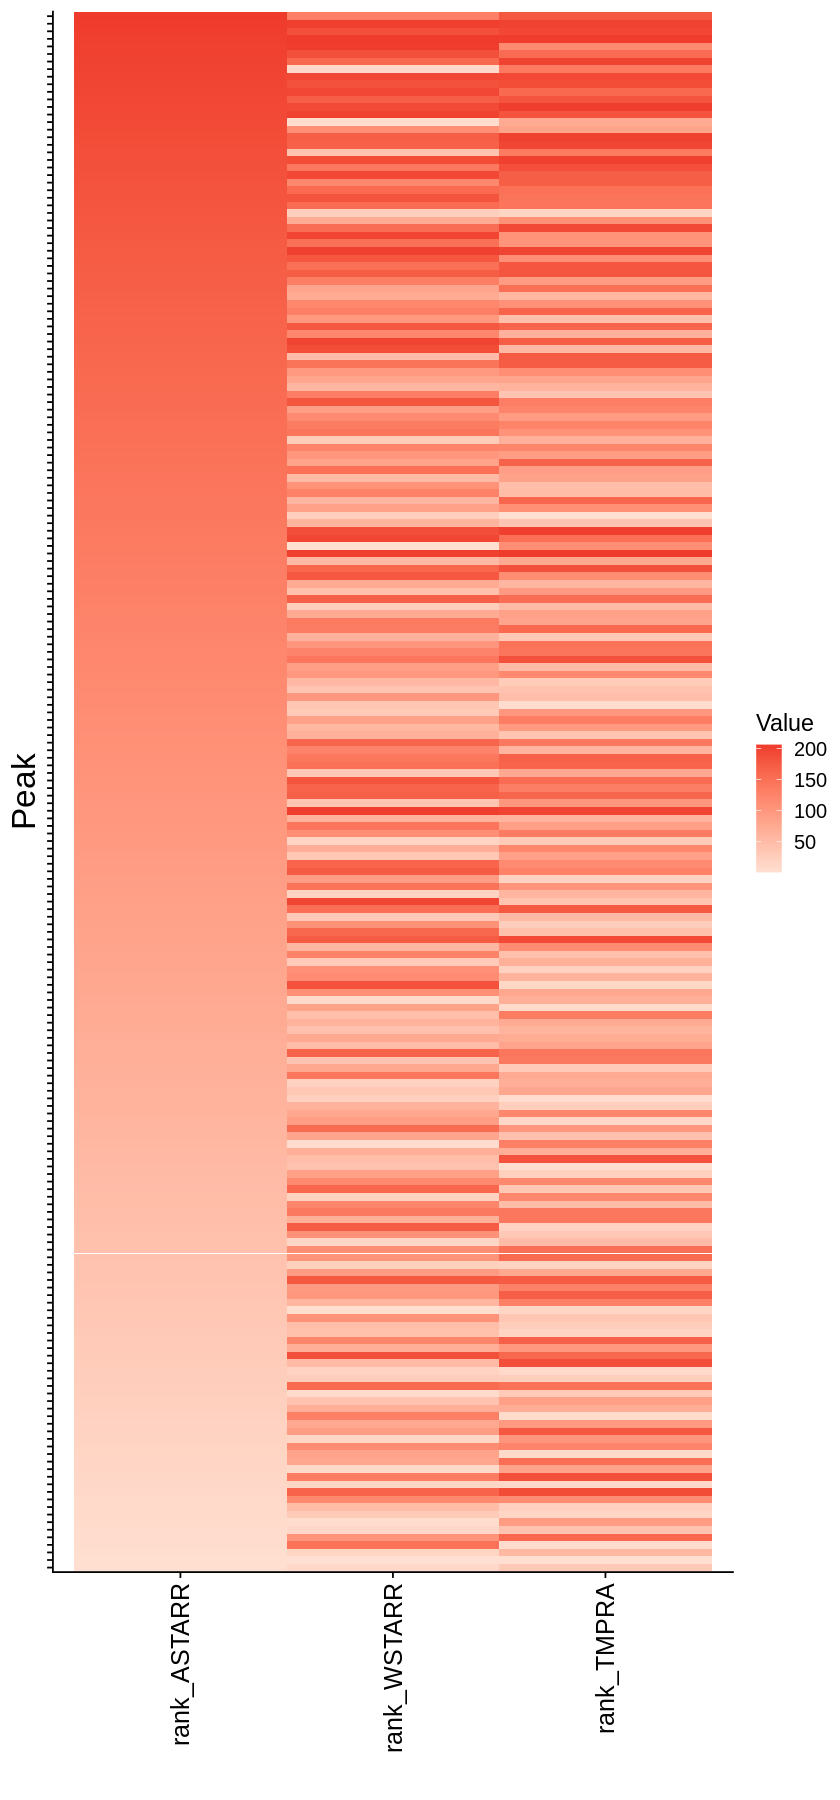

In [15]:
dat = lst[[2]] 
dat = dat %>% arrange(KS91_K562_ASTARRseq)
peaks = dat$Peak
assays = c("rank_ASTARR", "rank_WSTARR", "rank_TMPRA")

dat = dat %>% 
    dplyr::select(Peak, rank_ASTARR, rank_WSTARR, rank_TMPRA) %>% 
    tidyr::gather(Sample, Value, -Peak)

dat$Sample = factor(dat$Sample, levels=assays)
dat$Peak = factor(dat$Peak, levels = peaks)
gpt = ggplot(dat, aes(x=Sample, y=Peak, fill=Value)) + 
    geom_tile() + 
    labs(x="") +
    scale_fill_gradient2(
      low  = "white",
      mid  = "#fee0d2",
      high = "#ef3b2c") +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size = 20),
        axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_blank())

options(repr.plot.height=15, repr.plot.width=7)
print(gpt)